In [4]:
import sys
!{sys.executable} -m pip install fredapi

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.options.display.max_rows = 500
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = '6579c2d40bafcd38fbc9ca8c9accb895'

Matplotlib is building the font cache; this may take a moment.


## 1. Create the Fred Object

In [8]:
fred = Fred(api_key=fred_key)

## 2. Search Fred for Economical Data

In [12]:
sp_search = fred.search('S&P', order_by='popularity')

In [14]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-04-21,2023-04-21,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-04-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-04-21 08:42:03-05:00,95,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-04-21,2023-04-21,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-01-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-03-30 10:39:01-05:00,91,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-04-21,2023-04-21,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-04-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-04-21 08:42:07-05:00,84,This data represents the effective yield of th...
SP500,SP500,2023-04-21,2023-04-21,S&P 500,2013-04-22,2023-04-20,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-04-20 19:10:53-05:00,84,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-04-21,2023-04-21,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,81,Household data are collected as of March. As ...


## 3. Pull Raw Data and Plot

In [18]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

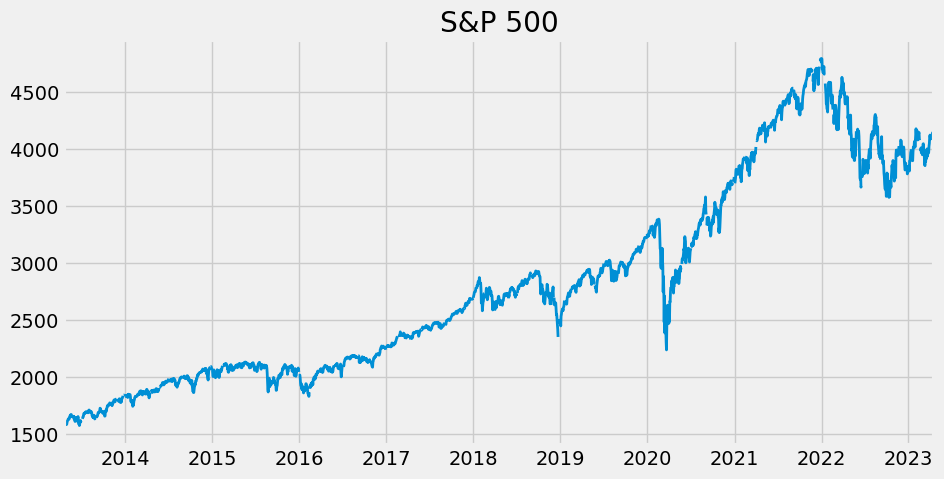

In [22]:
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)

## 4. Pull and Join Multiple Data Series

In [25]:
unemp_results = fred.search('unemployement')

In [26]:
unemp_results.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-04-21,2023-04-21,Unemployment Rate,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-04-21,2023-04-21,Unemployment Rate,1948-01-01,2023-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-04-07 07:43:02-05:00,57,The unemployment rate represents the number of...
NROU,NROU,2023-04-21,2023-04-21,Noncyclical Rate of Unemployment,1949-01-01,2033-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-03-21 15:19:03-05:00,70,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2023-04-21,2023-04-21,Continued Claims (Insured Unemployment),1967-01-07,2023-04-08,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-04-20 07:48:04-05:00,75,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2023-04-21,2023-04-21,Continued Claims (Insured Unemployment),1967-01-07,2023-04-08,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-04-20 07:48:10-05:00,36,"Continued claims, also referred to as insured ..."


In [37]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [46]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-04-21,2023-04-21,Unemployment Rate,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:02-05:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-04-21,2023-04-21,Unemployment Rate - Black or African American,1972-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:12-05:00,66,The series comes from the 'Current Population ...
CAUR,CAUR,2023-04-21,2023-04-21,Unemployment Rate in California,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:02-05:00,60,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-04-21,2023-04-21,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,56,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-04-21,2023-04-21,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,16,Series Is Presented Here As Three Variables--(...
LNS14000002,LNS14000002,2023-04-21,2023-04-21,Unemployment Rate - Women,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:16-05:00,53,To obtain estimates of women worker employment...
TXUR,TXUR,2023-04-21,2023-04-21,Unemployment Rate in Texas,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:08:02-05:00,52,None
FLUR,FLUR,2023-04-21,2023-04-21,Unemployment Rate in Florida,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:03-05:00,52,None
NYUR,NYUR,2023-04-21,2023-04-21,Unemployment Rate in New York,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:03-05:00,52,None
